In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, LeaveOneOut, cross_val_score, GridSearchCV, ParameterGrid
from sklearn.linear_model import Ridge, LogisticRegression, LinearRegression, Lasso, ElasticNet
from sklearn.metrics import confusion_matrix
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import warnings
import csv

1.1: Determine which features are continuous and which are categorical. Drop rows without a valid sales price. 

In [151]:
Sydney_data = pd.read_csv('Housing.csv')

Sydney_data.head(4600)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,7/9/2014 0:00,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,7/9/2014 0:00,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,7/9/2014 0:00,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,7/10/2014 0:00,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [152]:
Sydney_data.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

 2.1: The categorical features are street, city, statezip, country, and waterfront. The continuous features are the price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, view, condition, sqft_above, sqft_basement, yr_built, and yr_renovated. 



In [153]:
Sydney_data.drop(Sydney_data[Sydney_data['price']<= 0].index, inplace = True)

In [154]:
Sydney_data.head(4600)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,7/9/2014 0:00,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,7/9/2014 0:00,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,7/9/2014 0:00,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,7/10/2014 0:00,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


2.2: Visualize the univariate distrubution of each continuous feature, and the distribution of the target. Do you notice anything? Is there something that might require special treatment?

In [155]:
prices = Sydney_data['price']
bedrooms = Sydney_data['bedrooms']
bathrooms = Sydney_data['bathrooms']
sqft_living = Sydney_data['sqft_living']
sqft_lot = Sydney_data['sqft_lot']
floors = Sydney_data['floors']
views = Sydney_data['view']
conditions = Sydney_data['condition']
sqft_above = Sydney_data['sqft_above']
sqft_basement = Sydney_data.sqft_basement
year_built = Sydney_data.yr_built
year_renovated = Sydney_data.yr_renovated

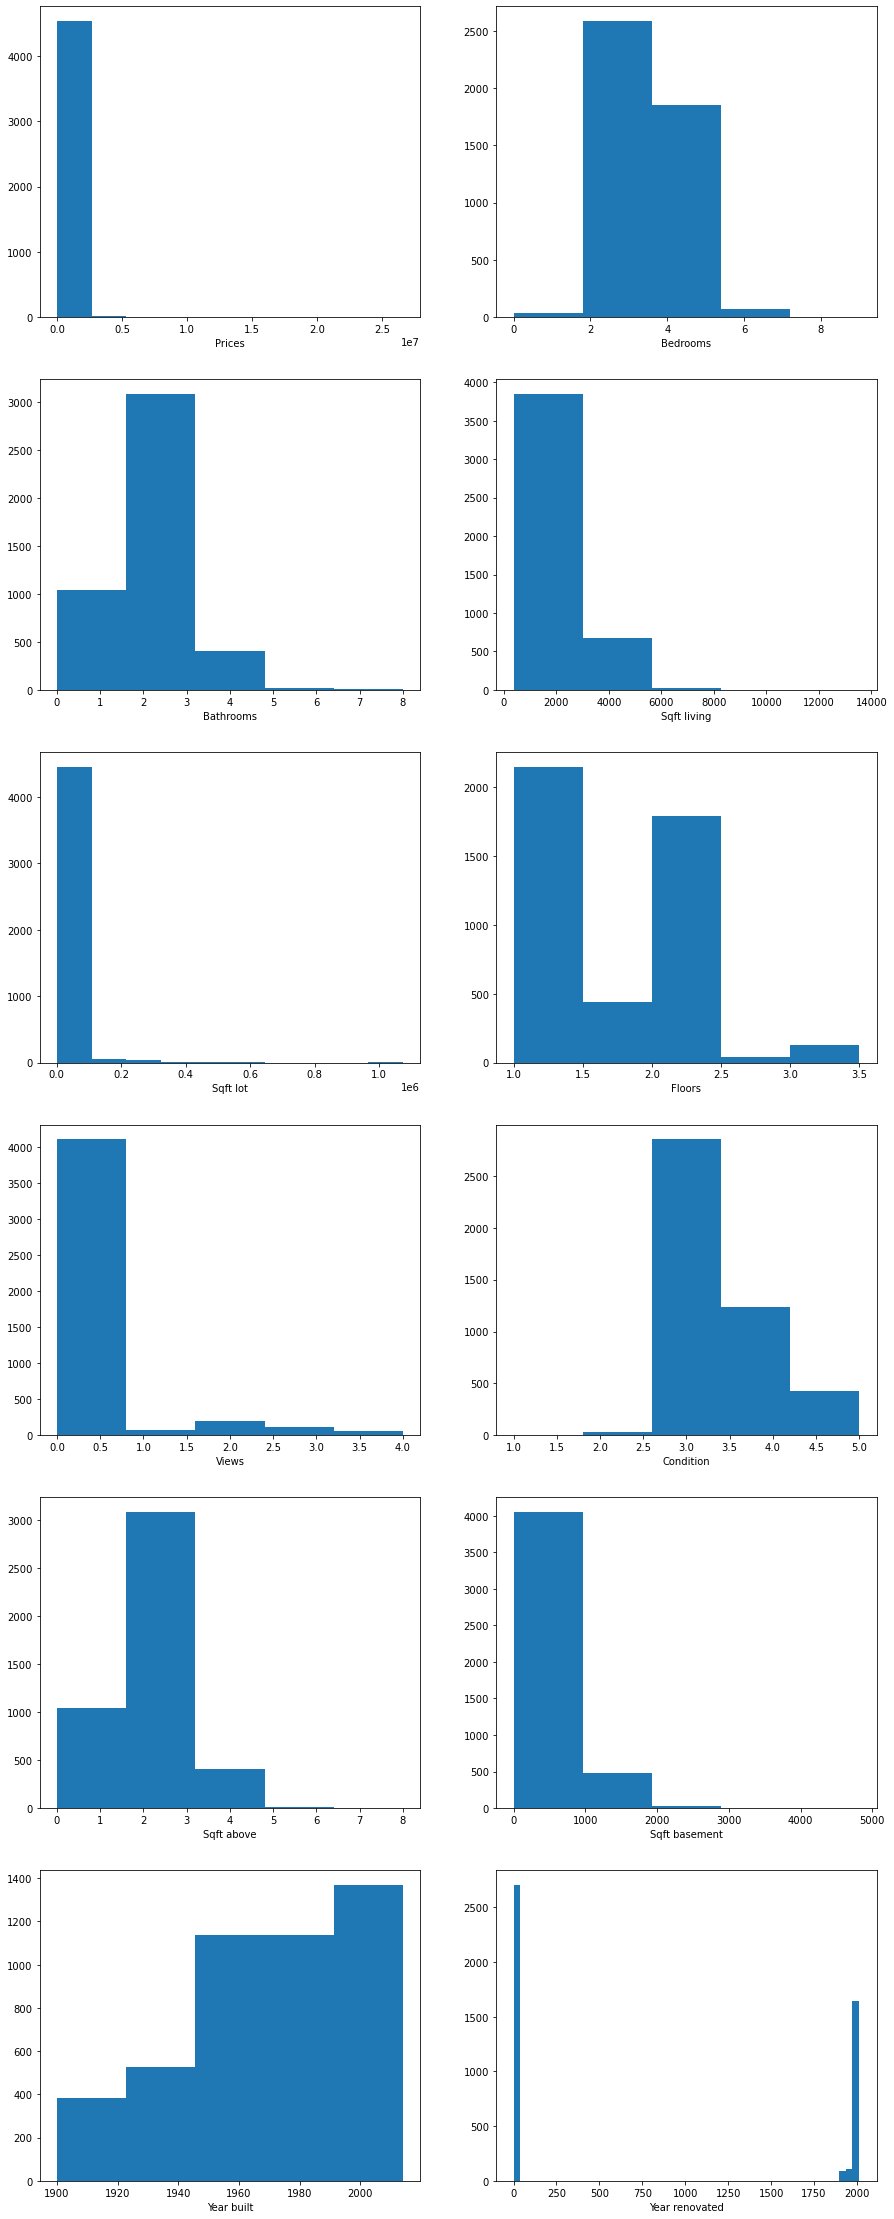

In [156]:
plt.figure(figsize=(15, 40))
ax1 = plt.subplot(6,2,1)
ax1.hist(prices, bins=10)
ax1.set_xlabel('Prices')

ax2 = plt.subplot(6,2,2)
ax2.hist(bedrooms, bins=5)
ax2.set_xlabel('Bedrooms')

ax3 = plt.subplot(6,2,3)
ax3.hist(bathrooms, bins=5)
ax3.set_xlabel('Bathrooms')

ax4 = plt.subplot(6,2,4)
ax4.hist(sqft_living, bins=5)
ax4.set_xlabel('Sqft living')

ax5 = plt.subplot(6,2,5)
ax5.hist(sqft_lot, bins=10)
ax5.set_xlabel('Sqft lot')

ax6 = plt.subplot(6,2,6)
ax6.hist(floors, bins=5)
ax6.set_xlabel('Floors')

ax7 = plt.subplot(6,2,7)
ax7.hist(views, bins=5)
ax7.set_xlabel('Views')

ax8 = plt.subplot(6,2,8)
ax8.hist(conditions, bins=5)
ax8.set_xlabel('Condition')

ax9 = plt.subplot(6,2,9)
ax9.hist(bathrooms, bins=5)
ax9.set_xlabel('Sqft above')

ax10 = plt.subplot(6,2,10)
ax10.hist(sqft_basement, bins=5)
ax10.set_xlabel('Sqft basement')

ax11 = plt.subplot(6,2,11)
ax11.hist(year_built, bins=5)
ax11.set_xlabel('Year built')

ax12 = plt.subplot(6,2,12)
ax12.hist(year_renovated, bins=50)
ax12.set_xlabel('Year renovated')

plt.show()

Upon analyzing the above histograms, it can be seen that many have large sections of 0 values, particularly within the year renovated column, indicating that the information was not available or recorded for that particular parameter. These rows with zeros need to be treated when moving forward with the anaysis. 

2.3: Visualize the dependency of the target on each continuous feature (2d scatter plot). 

In [157]:
bedrooms = Sydney_data['bedrooms']
bathrooms = Sydney_data['bathrooms']
sqft_living = Sydney_data['sqft_living']
sqft_lot = Sydney_data['sqft_lot']
floors = Sydney_data['floors']
views = Sydney_data['view']
conditions = Sydney_data['condition']
sqft_above = Sydney_data['sqft_above']
sqft_basement = Sydney_data.sqft_basement
year_built = Sydney_data.yr_built
year_renovated = Sydney_data.yr_renovated

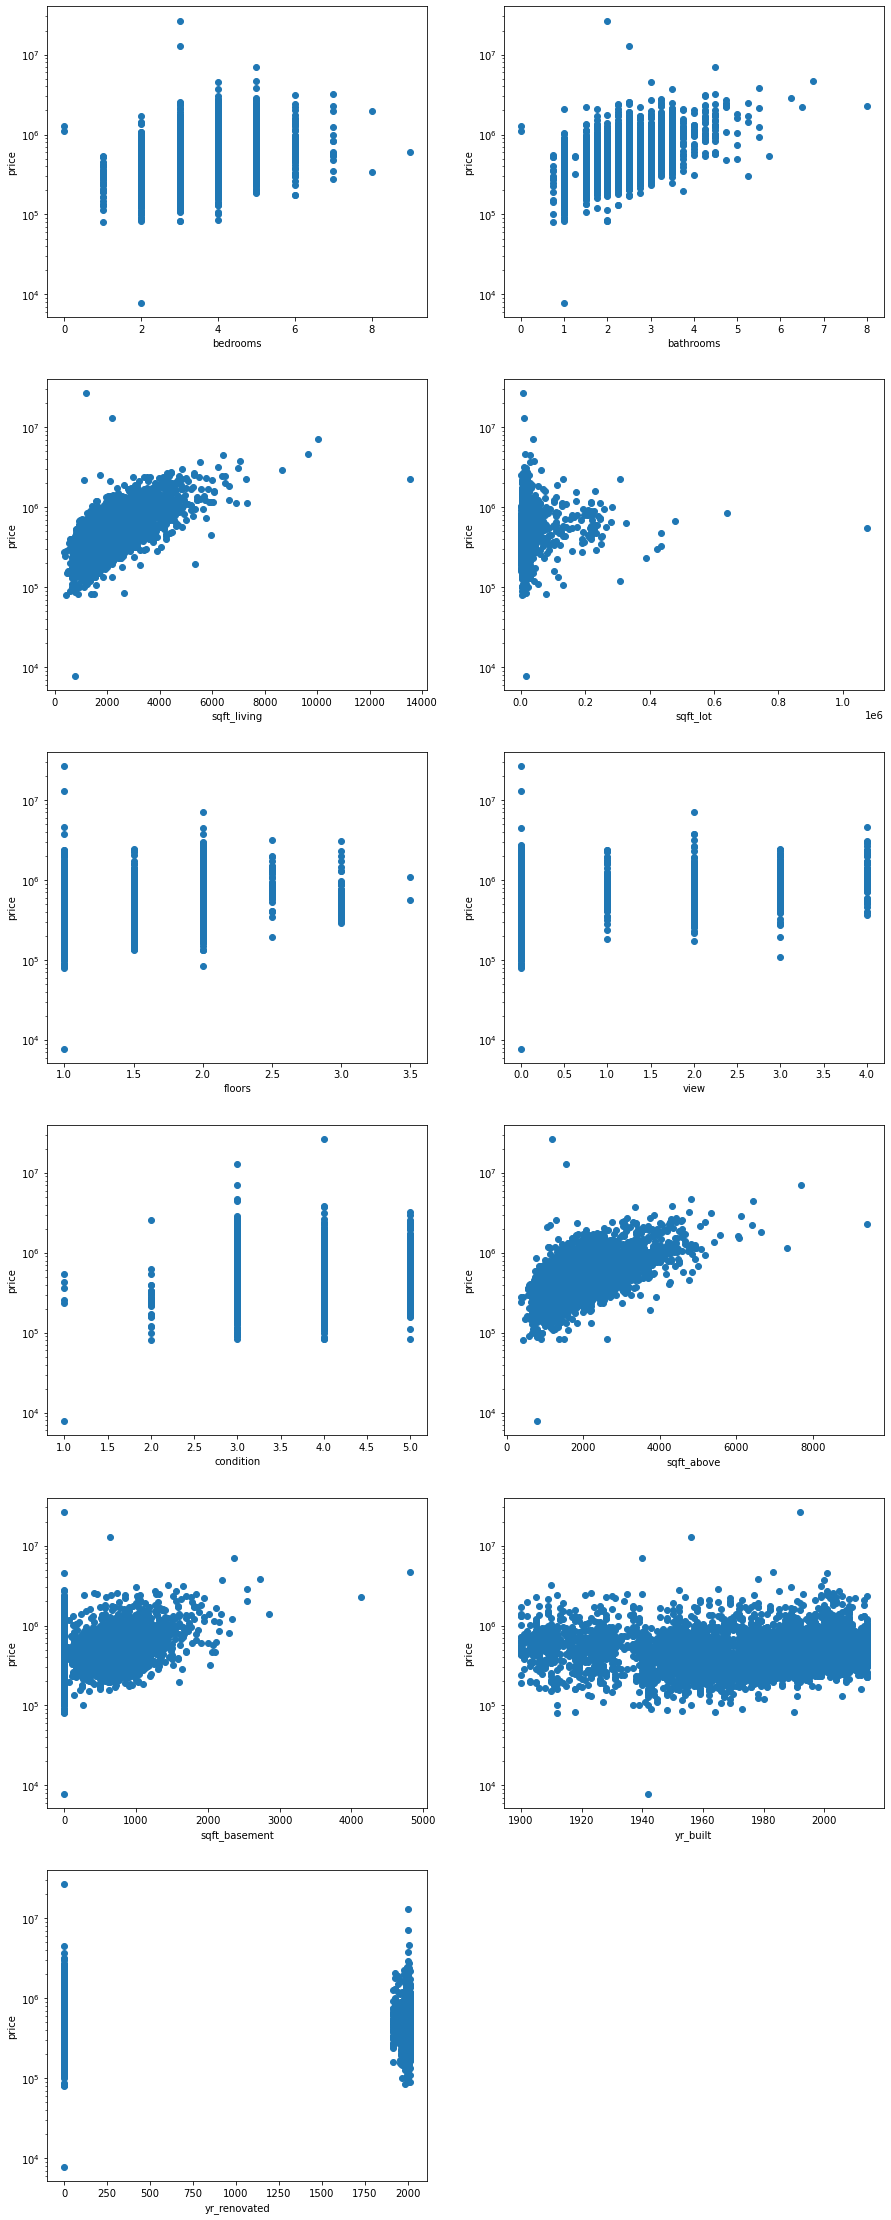

In [158]:
plt.figure(figsize=(15, 40))
ax1 = plt.subplot(6,2,1)
ax1.scatter(bedrooms, prices)
ax1.set_yscale('log')
ax1.set_xlabel('bedrooms')
ax1.set_ylabel('price')

ax2 = plt.subplot(6,2,2)
ax2.scatter(bathrooms, prices)
ax2.set_yscale('log')
ax2.set_xlabel('bathrooms')
ax2.set_ylabel('price')

ax3 = plt.subplot(6,2,3)
ax3.scatter(sqft_living, prices)
ax3.set_yscale('log')
ax3.set_xlabel('sqft_living')
ax3.set_ylabel('price')

ax4 = plt.subplot(6,2,4)
ax4.scatter(sqft_lot, prices)
ax4.set_yscale('log')
ax4.set_xlabel('sqft_lot')
ax4.set_ylabel('price')

ax5 = plt.subplot(6,2,5)
ax5.scatter(floors, prices)
ax5.set_yscale('log')
ax5.set_xlabel('floors')
ax5.set_ylabel('price')

ax6 = plt.subplot(6,2,6)
ax6.scatter(views, prices)
ax6.set_yscale('log')
ax6.set_xlabel('view')
ax6.set_ylabel('price')

ax7 = plt.subplot(6,2,7)
ax7.scatter(conditions, prices)
ax7.set_yscale('log')
ax7.set_xlabel('condition')
ax7.set_ylabel('price')

ax8 = plt.subplot(6,2,8)
ax8.scatter(sqft_above, prices)
ax8.set_yscale('log')
ax8.set_xlabel('sqft_above')
ax8.set_ylabel('price')

ax9 = plt.subplot(6,2,9)
ax9.scatter(sqft_basement, prices)
ax9.set_yscale('log')
ax9.set_xlabel('sqft_basement')
ax9.set_ylabel('price')

ax10 = plt.subplot(6,2,10)
ax10.scatter(year_built, prices)
ax10.set_yscale('log')
ax10.set_xlabel('yr_built')
ax10.set_ylabel('price')

ax11 = plt.subplot(6,2,11)
ax11.scatter(year_renovated, prices)
ax11.set_yscale('log')
ax11.set_xlabel('yr_renovated')
ax11.set_ylabel('price')


plt.show()

2.4: Split data in training and test set. Use Column transformer and pipline to encode categorical variables. Impute missing values using SimpleImputer. Evaluate Linear Regression (OLS), Ridge, lasso, and ElasticNet using cross-validation with the default parameters. Does scaling the data (within the pipeline) with StandardScaler help? 

In [159]:
Sydney_data['yr_renovated'] = Sydney_data['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)


In [160]:
Sydney_data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005.0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,NaN,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,NaN,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,NaN,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992.0,9105 170th Ave NE,Redmond,WA 98052,USA


In [166]:
Sydney_data[['waterfront']] = Sydney_data[['waterfront']].astype('str')
categorical_features = ['city', 'statezip', 'country', 'waterfront']
continuous_features = [feature for feature in list(Sydney_data.columns) if feature not in categorical_features and feature != 'date' and feature != 'price' and feature != 'street']
all_features = continuous_features + categorical_features 

In [167]:

price_df = Sydney_data.iloc[:,1]
features_df = Sydney_data[all_features]
X_trainval_pipe, X_test_pipe, y_trainval_pipe, y_test_pipe = train_test_split(features_Sydney_data, price_Sydney_data, test_size=0.2)

In [168]:
category_check = features_df.dtypes == object
category_check

bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
city              True
statezip          True
country           True
waterfront        True
dtype: bool

In [169]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, LinearRegression())
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.262


In [170]:
preprocess = make_column_transformer(
    (StandardScaler(), ~category_check),
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, LinearRegression())
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.493


As can be seen above, linear regression proves to be improved through scaling. Ridge regression and Ridge regression scaled can be seen in the two cells below. 

In [175]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model_ridge = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Ridge())
model_ridge.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model_ridge, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.270


In [176]:
preprocess = make_column_transformer(
    (StandardScaler(), ~category_check),
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model_ridge = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Ridge())
model_ridge.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model_ridge, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.499


The two cells below are both utilizing the lasso method. 

In [179]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Lasso(max_iter=1000, tol=10000.008))
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.248


In [102]:
preprocess = make_column_transformer(
    (StandardScaler(), ~category_check),
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Lasso(max_iter=5000, tol=1000.009))
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.364


Lastly, the cells below are ran utilizing the ElasticNet Method

In [180]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, ElasticNet())
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.034


In [181]:
preprocess = make_column_transformer(
    (StandardScaler(), ~category_check),
    (OneHotEncoder(handle_unknown='ignore'), category_check))
model = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, ElasticNet())
model.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.399


Upon looking at the results above, it is apparent that the ridge regression performed the best for scaling. However, this was still a helpful method for all of the different methods. 

2.5: Tune the parameters of the models using GridSearchCV. Do the results improve? Visualize the dependence of the validation score on the parameters for Ridge, Lasso, and ElasticNet. 

In [182]:
for feature in features_df.iteritems():
  if feature[0] in categorical_features:
    features_df = pd.get_dummies(features_df)

In [207]:
features_df.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,...,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,country_USA,waterfront_0,waterfront_1
0,3,1.50,1340,7912,1.5,0,3,1340,0,1955,...,0,0,0,0,0,0,0,1,1,0
1,5,2.50,3650,9050,2.0,4,5,3370,280,1921,...,0,0,0,0,0,0,0,1,1,0
2,3,2.00,1930,11947,1.0,0,4,1930,0,1966,...,0,0,0,0,0,0,0,1,1,0
3,3,2.25,2000,8030,1.0,0,4,1000,1000,1963,...,0,0,0,0,0,0,0,1,1,0
4,4,2.50,1940,10500,1.0,0,4,1140,800,1976,...,0,0,0,0,0,0,0,1,1,0


In [208]:
X_trainval, X_test, y_trainval, y_test = train_test_split(features_df, price_df, test_size=0.3)

The below cells show GridSearch CV utilized on Ridge

In [194]:
lr_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), Ridge())
param_grid = {"ridge__alpha" : np.logspace(-3, 3, 13)}
grid_lr = GridSearchCV(lr_pipe, param_grid, cv=5, return_train_score=True)
grid_lr.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_lr.best_score_))
print("best parameters: {}".format(grid_lr.best_params_))

best mean cross-validation score: 0.740
best parameters: {'ridge__alpha': 3.1622776601683795}


In [195]:
model_ridge = make_pipeline(SimpleImputer(strategy='most_frequent'), Ridge(alpha=10.0))
model_ridge.fit(X_trainval, y_trainval)
scores = cross_val_score(model_ridge, X_trainval, y_trainval, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.735


The below cells show GridSearchCV utilized on Lasso

In [210]:
with warnings.catch_warnings(record=True) as w:
  l_pipe = make_pipeline(SimpleImputer(strategy='mean'), Lasso())
  param_grid = {"lasso__alpha" : range(10, 2000, 50)}
  grid_l = GridSearchCV(l_pipe, param_grid, cv=5, return_train_score=True)
  grid_l.fit(X_trainval, y_trainval)
  print("best mean cross-validation score: {:.3f}".format(grid_l.best_score_))
  print("best parameters: {}".format(grid_l.best_params_))

best mean cross-validation score: 0.571
best parameters: {'lasso__alpha': 410}


In [209]:
model_lasso = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, Lasso(alpha=310))
model_lasso.fit(X_trainval_pipe, y_trainval_pipe)
scores = cross_val_score(model_lasso, X_trainval_pipe, y_trainval_pipe, cv=5)
print("score: {:.3f}".format(np.mean(scores)))

score: 0.501


The below cells show GridSearchCV utilized on Elastic Net

In [211]:
with warnings.catch_warnings(record=True) as w:
  en_pipe = make_pipeline(SimpleImputer(strategy='mean'), ElasticNet())
  param_grid = {'elasticnet__alpha': np.logspace(-4, -1, 10),
                'elasticnet__l1_ratio': [0.01, .1, .5, .8, .9, .95, .98, 1]}
  grid_en = GridSearchCV(en_pipe, param_grid, cv=5, return_train_score=True)
  grid_en.fit(X_trainval, y_trainval)
  print("best mean cross-validation score: {:.3f}".format(grid_en.best_score_))
  print("best parameters: {}".format(grid_en.best_params_))

best mean cross-validation score: 0.577
best parameters: {'elasticnet__alpha': 0.004641588833612777, 'elasticnet__l1_ratio': 0.1}


In [212]:
with warnings.catch_warnings(record=True) as w:
  model_en = make_pipeline(SimpleImputer(strategy='most_frequent'), preprocess, ElasticNet(alpha=0.021544346900318822, l1_ratio=0.95))
  model_en.fit(X_trainval_pipe, y_trainval_pipe)
  scores = cross_val_score(model_en, X_trainval_pipe, y_trainval_pipe, cv=5)
  print("score: {:.3f}".format(np.mean(scores)))

score: 0.504


In [213]:
print("test-set score: {:.3f}".format(grid_l.score(X_test, y_test)))

test-set score: 0.404


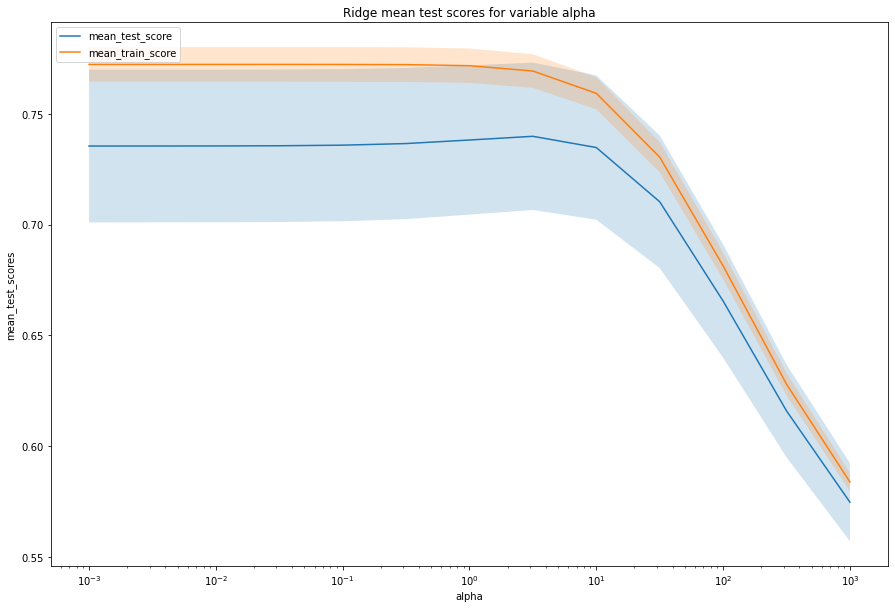

In [214]:
lr_alphavalues = np.logspace(-3, 3, 13)
lr_mean_test_scores = np.asarray(grid_lr.cv_results_['mean_test_score'])
lr_mean_train_scores = np.asarray(grid_lr.cv_results_['mean_train_score'])
std_test = np.asarray(grid_lr.cv_results_['std_test_score'])
std_train = np.asarray(grid_lr.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(lr_alphavalues, lr_mean_test_scores, label='mean_test_score')
ax.plot(lr_alphavalues, lr_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(lr_alphavalues, lr_mean_test_scores + std_test, lr_mean_test_scores - std_test, alpha=0.2)
ax.fill_between(lr_alphavalues, lr_mean_train_scores+std_train, lr_mean_train_scores-std_train, alpha=0.2)

ax.set(xlabel='alpha', ylabel='mean_test_scores',
       title='Ridge mean test scores for variable alpha')
ax.legend(loc='upper left')

plt.show()


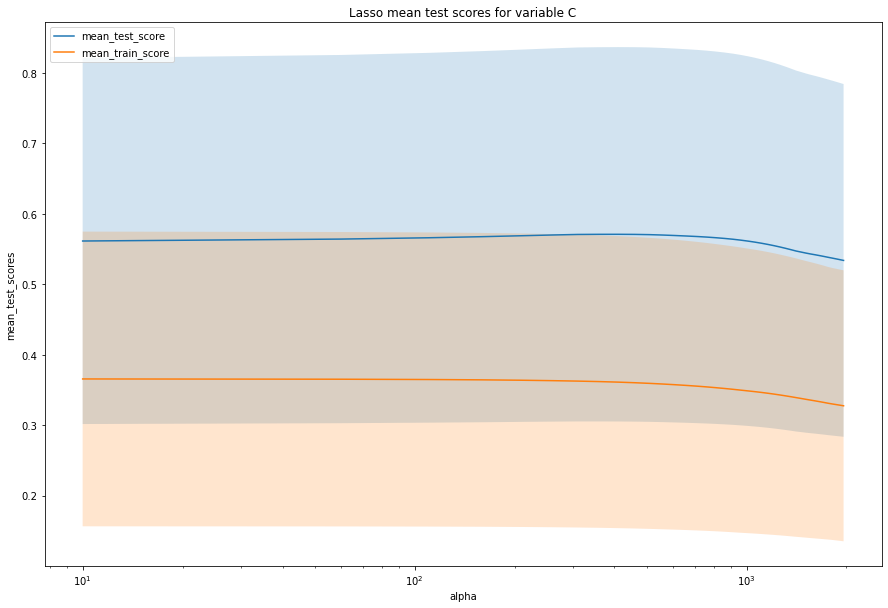

In [215]:
l_alphavalues = range(10, 2000, 50)
l_mean_test_scores = np.asarray(grid_l.cv_results_['mean_test_score'])
l_mean_train_scores = np.asarray(grid_l.cv_results_['mean_train_score'])
std_test = np.asarray(grid_l.cv_results_['std_test_score'])
std_train = np.asarray(grid_l.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(l_alphavalues, l_mean_test_scores, label='mean_test_score')
ax.plot(l_alphavalues, l_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(l_alphavalues, l_mean_test_scores + std_test, l_mean_test_scores - std_test, alpha=0.2)
ax.fill_between(l_alphavalues, l_mean_train_scores+std_train, l_mean_train_scores-std_train, alpha=0.2)

ax.set(xlabel='alpha', ylabel='mean_test_scores',
       title='Lasso mean test scores for variable C')
ax.legend(loc='upper left')

plt.show()


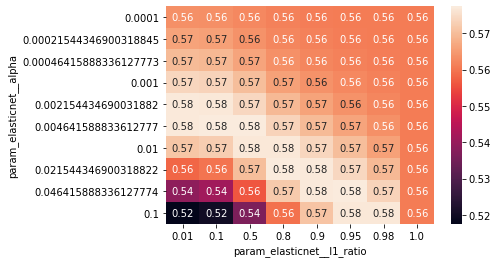

In [216]:
res = pd.pivot_table(pd.DataFrame(grid_en.cv_results_),
    values='mean_test_score', index='param_elasticnet__alpha', columns='param_elasticnet__l1_ratio')
sns.heatmap(res, annot=True)
plt.show()